In [85]:
import numpy as np
import matplotlib.pyplot as plt

In [86]:
%matplotlib notebook
fontsize = 15

In [87]:
def getangles(startangle, newangle1, newangle2, count, f):
    '''
    Recursive algorithm that generates new surfaces from old ones
    Input arguments: 
        Starting angle (startangle)
        Perturbation to it (newangle)
        Number of layers (count)
        A dampening factor that reduces the perturbation with each new layer (f)

    '''    
    if count == 0:
        return (startangle,)
    if startangle < ((12*np.pi)/180):
        return (*getangles(startangle+newangle1,newangle1/f,newangle2, count-1,f), \
                *getangles(startangle-newangle1,newangle1/f,newangle2, count-1,f))
    else:
        return (*getangles(startangle+newangle2,newangle1, newangle2/f,count-1,f), \
            *getangles(startangle-newangle2,newangle1, newangle2/f,count-1,f))


In [88]:
# Parameters for a run
startangle = 0
newangle1_degrees = -1
newangle1 = newangle1_degrees*np.pi/180
newangle2_degrees = -2.5
newangle2 = newangle2_degrees*np.pi/180
rpercent = 4
rfactor = 1+rpercent/100

<IPython.core.display.Javascript object>


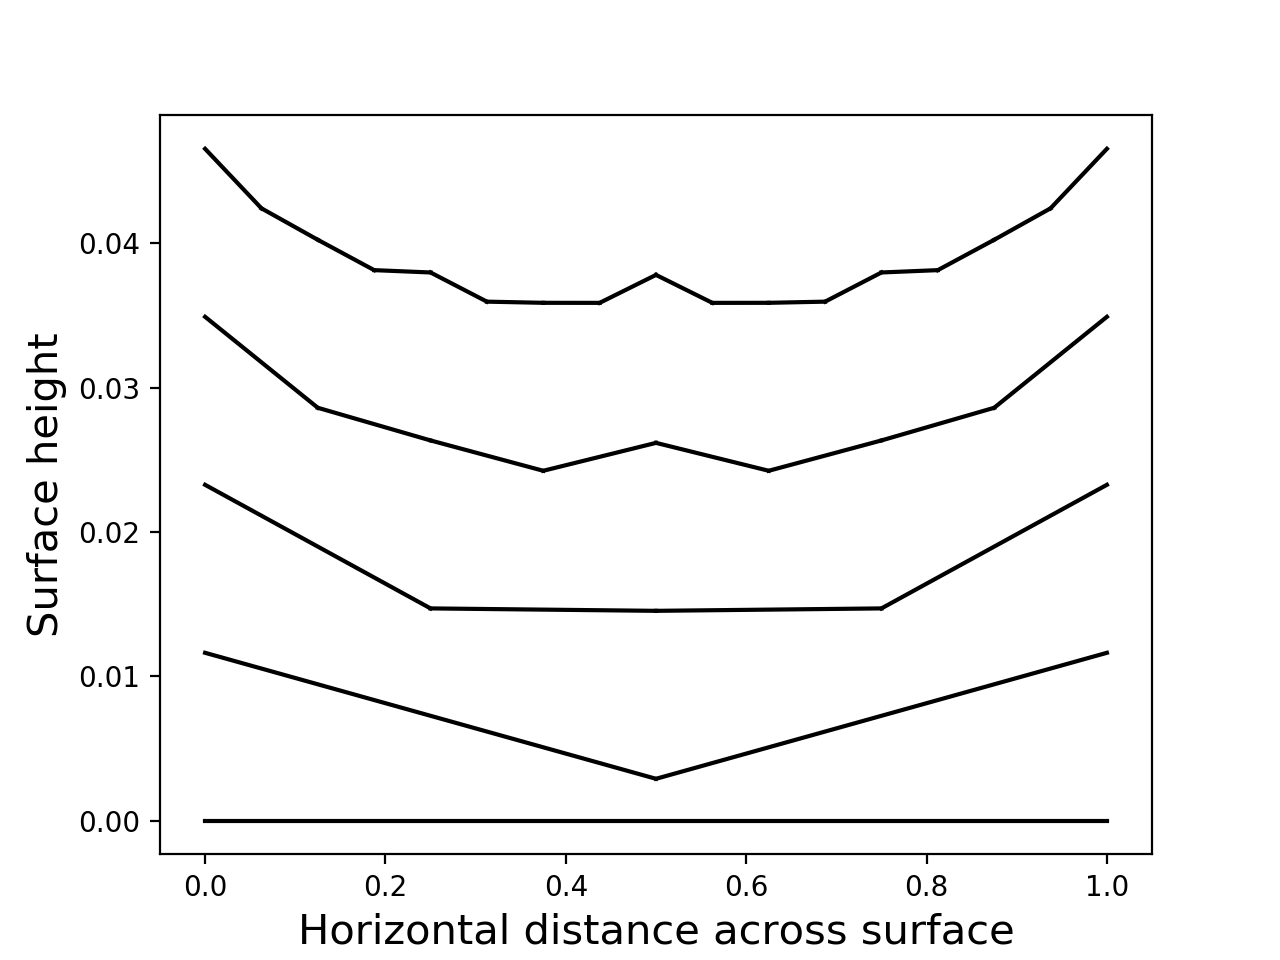

[ -3.78056334e+00  -1.99790749e+00  -1.92670435e+00  -1.47986219e-01
  -1.85265939e+00  -7.40214340e-02  -2.90168412e-03   1.77565918e+00
  -1.77565918e+00   2.90168412e-03   7.40214340e-02   1.85265939e+00
   1.47986219e-01   1.92670435e+00   1.99790749e+00   3.78056334e+00]


In [89]:
# Get a short list of angles and graph what the surface looks like

# Specify the maximum number of layers
maxcount = 5

# String them together and graph
plt.figure()
unitdistance = 1.0
offsety = np.abs(unitdistance*np.tan(newangle1))/1.5 # This factor determines how packed together the graphs are
for count in range(maxcount):
    thisone = np.tan(getangles(startangle,newangle1,newangle2, count,rfactor))
    length = len(thisone)
    distancex = unitdistance/length
    startx = 0.0
    starty = offsety*count
    for i in range(len(thisone)):
        xline = np.array([startx,startx+distancex])
        distancey = distancex*thisone[i]
        yline = np.array([starty,starty+distancey])
        plt.plot(xline, yline,'k')
        startx += distancex
        starty += distancey
plt.xlabel('Horizontal distance across surface',fontsize=fontsize)
plt.ylabel('Surface height',fontsize=fontsize)
print(thisone*180/np.pi)

Angles in histogram:  [  8.67170715  12.17168644  14.79755602  16.96340164  18.8312515
  20.48502483  21.97505483  23.33444403  24.58639373  25.74794326]


<IPython.core.display.Javascript object>


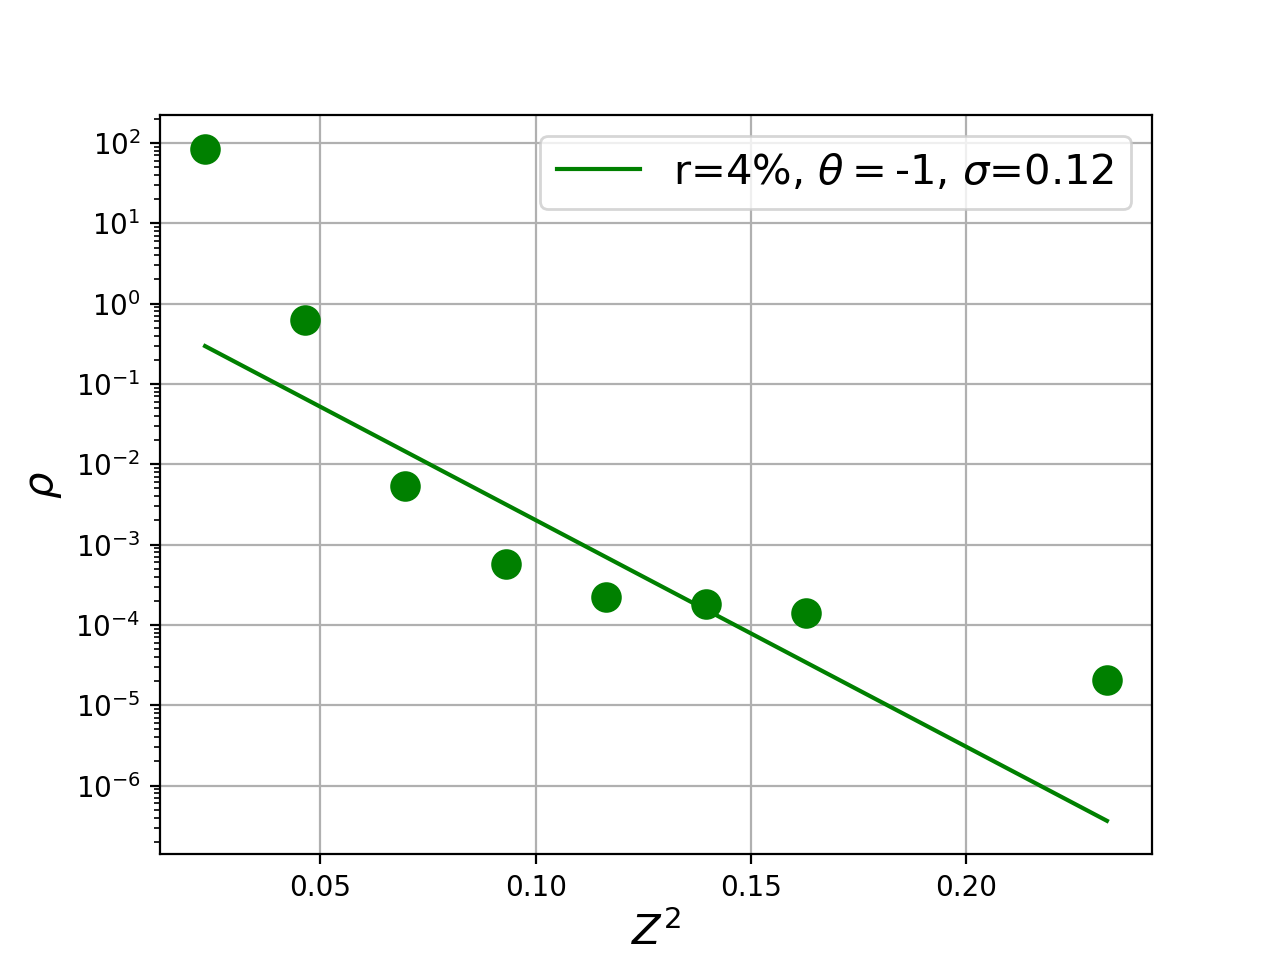

Text(0,0.5,'$\\rho$')

In [90]:
# Make a probability distribution function from a many-layer sequence

# Specify the number of layers
count = 22

# Get gradient-squared
Z2 = (np.tan(getangles(startangle,newangle1,newangle2,count,rfactor)))**2
hist = np.histogram(Z2)
Z2fromhist = hist[1][1:]; #print(Z2fromhist)
rhofromhist = hist[0]; #print(rhofromhist)
norm = np.trapz(rhofromhist,Z2fromhist); #print(norm)
rhofromhist = rhofromhist/norm
ikeep = np.nonzero(rhofromhist)
Z2fromhistkeep = Z2fromhist[ikeep]; #print(Z2fromhistkeep)
logrhofromhistkeep = np.log(rhofromhist[ikeep]); #print(logrhofromhistkeep)
rhofromhistkeep = np.exp(logrhofromhistkeep)

# This is just interesting ... what are the angles that come out of the histogram?
thetafromhist = np.arctan(Z2fromhist**.5)*180/np.pi
print('Angles in histogram: ', thetafromhist)

# Graph it
plt.figure()
plt.semilogy(Z2fromhistkeep,rhofromhistkeep,'og',markersize=10)

# Graph a best-fit line too
thisrange = [i for i in range(1,7)]
p1 = np.polyfit(Z2fromhistkeep[thisrange],logrhofromhistkeep[thisrange],1)
best_sigma1 = 1/np.sqrt(-p1[0])
label_sigma1 = 'r='+str(rpercent)+r'%, $\theta=$'+str(newangle1_degrees)+r', $\sigma$='+str(np.round(best_sigma1*100)/100) 
plt.semilogy(Z2fromhistkeep,np.exp(np.polyval(p1,Z2fromhistkeep)),'g', label=label_sigma1)

# Cosmetics
plt.legend(fontsize=fontsize)
plt.grid(True)
plt.xlabel('$Z^2$',fontsize=fontsize)
plt.ylabel(r'$\rho$',fontsize=fontsize)